In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [2]:
import os
from pathlib import Path

import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from adad.utils import create_dir

In [3]:
PATH_ROOT = Path(os.getcwd()).parent.parent
print(PATH_ROOT)

PATH_DATA = os.path.join(Path(os.getcwd()).parent.parent, "data", "numeric", "raw")
PATH_DATA = Path(PATH_DATA).absolute()
print(PATH_DATA)

PATH_OUTPUT = os.path.join(Path(os.getcwd()).parent.parent, "data", "numeric", "clean")
PATH_PREPROCESSED = os.path.join(
    Path(os.getcwd()).parent.parent, "data", "numeric", "preprocessed"
)
print(PATH_OUTPUT)
create_dir(PATH_OUTPUT)
create_dir(PATH_PREPROCESSED)

/home/lukec/workspace/applicabilityDomain
/home/lukec/workspace/applicabilityDomain/data/numeric/raw
/home/lukec/workspace/applicabilityDomain/data/numeric/clean


## 1. Abalone

In [4]:
path_data = os.path.join(PATH_DATA, "abalone.dat")
cols = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole_weight",
    "Shucked_weight",
    "Viscera_weight",
    "Shell_weight",
    "Rings",
]
df = pd.read_csv(path_data, skiprows=13, names=cols, index_col=None, header=None)
print(df.shape)
df.head()

(4174, 9)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
print(df["Rings"].nunique())

print(len(df[df["Rings"] >= 10]))
print(len(df[df["Rings"] < 10]))

28
2080
2094


In [6]:
# Assign # of rings greater and equal to 10 as 1, less than 10 as 0
df["Class"] = (
    df["Rings"].apply(lambda x: 0 if x < 10 else 1).astype("category").cat.codes
)
df = df.drop(["Rings", "Sex"], axis=1)

# Only keep Male and Female classes
df = df[(df["Class"] == 0) | (df["Class"] == 1)]

print(df.shape)
df.head()

(4174, 8)


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


<AxesSubplot:>

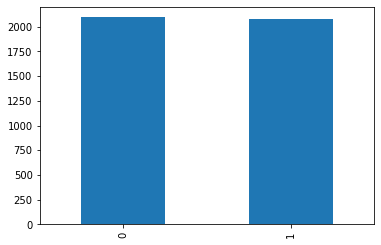

In [7]:
df["Class"].value_counts().plot(kind="bar")

In [8]:
# Save data
path_output = os.path.join(PATH_OUTPUT, "abalone.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/abalone.csv


In [9]:
def preprocessing(df, method="minmax"):
    """Drop redandent columns and apply scaling."""
    col_redundant = df.columns[df.nunique() == 1]
    if len(col_redundant) > 0:
        print("Remove:", col_redundant)
        df = df.drop(col_redundant, axis=1)

    if method == "minmax":
        scaler = MinMaxScaler()
    elif method == "std":
        scaler = StandardScaler()
    col_X = df.columns[~df.columns.isin(["Class"])]
    df_preprocessing = pd.DataFrame(df)
    df_preprocessing[col_X] = (
        scaler.fit_transform(df[col_X]).round(6).astype(np.float32)
    )
    df_preprocessing["Class"] = df_preprocessing["Class"].astype(int)
    return df_preprocessing

In [10]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,1
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,1
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0


In [11]:
path_preprocessed = os.path.join(PATH_PREPROCESSED, "abalone_scale.csv")
print(f"Save to: {path_preprocessed}")
df_preprocess.to_csv(path_preprocessed, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/preprocessed/abalone_scale.csv


## 2. Australian

In [12]:
path_data = os.path.join(PATH_DATA, "australian.dat")
col_names = ["A{}".format(i) for i in range(1, 15)] + ["Class"]
print(col_names)
df = pd.read_csv(path_data, sep="\s+", names=col_names, header=None)
df["Class"] = df["Class"].astype("category").cat.codes
print(df.shape)
df.head()

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'Class']
(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


<AxesSubplot:>

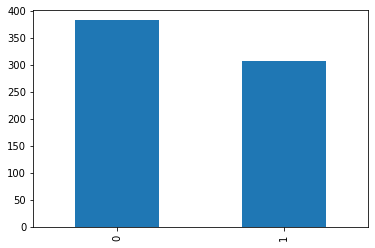

In [13]:
df["Class"].value_counts().plot(kind="bar")

In [14]:
path_output = os.path.join(PATH_OUTPUT, "australian.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/australian.csv


In [15]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05,0.01212,0
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08,0.00000,0
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14,0.00000,0
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00,0.00000,1
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03,0.00158,1


In [16]:
df_preprocess.to_csv(
    os.path.join(PATH_PREPROCESSED, "australian_scale.csv"), index=False
)

# 3. Banknote

In [17]:
path_data = os.path.join(PATH_DATA, "banknote.csv")
df = pd.read_csv(path_data)
df["Class"] = df["Class"].astype("category").cat.codes
print(df.shape)
df.head()

(1372, 5)


,variance,skewness,curtosis,entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<AxesSubplot:>

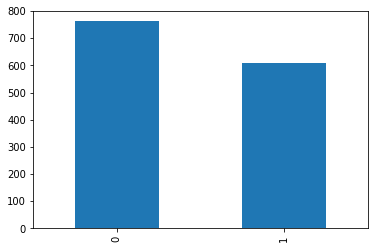

In [18]:
df["Class"].value_counts().plot(kind="bar")

In [19]:
path_output = os.path.join(PATH_OUTPUT, "banknote.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/banknote.csv


In [20]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,variance,skewness,curtosis,entropy,Class
0,0.769004,0.839643,0.106783,0.736628,0
1,0.835659,0.820982,0.121804,0.644326,0
2,0.786629,0.416648,0.310608,0.786951,0
3,0.757105,0.871699,0.054921,0.450440,0
4,0.531578,0.348662,0.424662,0.687362,0


In [21]:
df_preprocess.to_csv(os.path.join(PATH_PREPROCESSED, "banknote_scale.csv"), index=False)

## 4. Breast Cancer

In [22]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
col_names = dataset.feature_names

df = pd.DataFrame(X, columns=col_names)
df["Class"] = pd.Series(y, dtype="category").cat.codes

print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:>

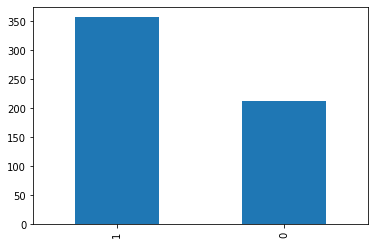

In [23]:
df["Class"].value_counts().plot(kind="bar")

In [24]:
path_output = os.path.join(PATH_OUTPUT, "breastcancer.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/breastcancer.csv


In [25]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0


In [26]:
df_preprocess.to_csv(
    os.path.join(PATH_PREPROCESSED, "breastcancer_scale.csv"), index=False
)

## 5. CMC

In [27]:
path_data = os.path.join(PATH_DATA, "cmc.data")
col_names = [
    "W_age",
    "W_edu",
    "H_edu",
    "Children",
    "W_religion",
    "W_work",
    "H_occ",
    "SoL",
    "Media",
    "Class",
]
df = pd.read_csv(path_data, index_col=None, header=None, names=col_names)
df["Class"] = df["Class"].astype("category").cat.codes
print(df.shape)
df.head()

(1473, 10)


,W_age,W_edu,H_edu,Children,W_religion,W_work,H_occ,SoL,Media,Class
0,24,2,3,3,1,1,2,3,0,0
1,45,1,3,10,1,1,3,4,0,0
2,43,2,3,7,1,1,3,4,0,0
3,42,3,2,9,1,1,3,3,0,0
4,36,3,3,8,1,1,3,2,0,0


<AxesSubplot:>

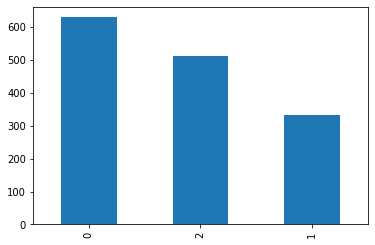

In [28]:
df["Class"].value_counts().plot(kind="bar")

In [29]:
path_output = os.path.join(PATH_OUTPUT, "cmc.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/cmc.csv


In [30]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,W_age,W_edu,H_edu,Children,W_religion,W_work,H_occ,SoL,Media,Class
0,0.242424,0.333333,0.666667,0.1875,1.0,1.0,0.333333,0.666667,0.0,0
1,0.878788,0.000000,0.666667,0.6250,1.0,1.0,0.666667,1.000000,0.0,0
2,0.818182,0.333333,0.666667,0.4375,1.0,1.0,0.666667,1.000000,0.0,0
3,0.787879,0.666667,0.333333,0.5625,1.0,1.0,0.666667,0.666667,0.0,0
4,0.606061,0.666667,0.666667,0.5000,1.0,1.0,0.666667,0.333333,0.0,0


In [31]:
df_preprocess.to_csv(os.path.join(PATH_PREPROCESSED, "cmc_scale.csv"), index=False)

## 6. HTRU2

In [33]:
path_data = os.path.join(PATH_DATA, "HTRU_2.csv")
col_names = ["A{}".format(i) for i in range(1, 9)] + ["Class"]
df = pd.read_csv(path_data, names=col_names, index_col=None, header=None)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(17898, 9)


,A1,A2,A3,A4,A5,A6,A7,A8,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


<AxesSubplot:>

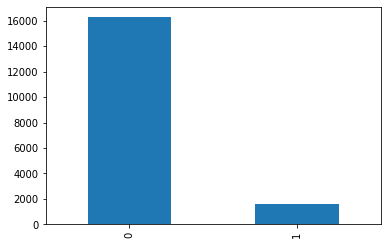

In [34]:
df["Class"].value_counts().plot(kind="bar")

<AxesSubplot:>

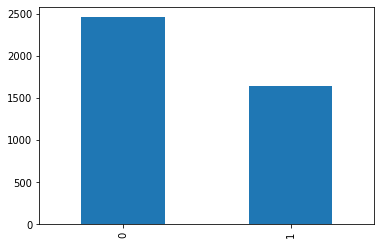

In [45]:
n = df[df["Class"] == 1].shape[0]

# Applying sampling change ratio to 2:3
df0 = df[df["Class"] == 0].sample(int(n * 1.5), replace=False)
df1 = df[df["Class"] == 1]
df = pd.concat([df0, df1])

df["Class"].value_counts().plot(kind="bar")

In [46]:
path_output = os.path.join(PATH_OUTPUT, "htru2_subset.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/htru2_subset.csv


In [47]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,A1,A2,A3,A4,A5,A6,A7,A8,Class
15240,0.458618,0.218786,0.244106,0.050585,0.007803,0.078768,0.414075,0.141030,0
7445,0.576037,0.281556,0.231553,0.031966,0.009847,0.088678,0.333853,0.084837,0
9542,0.669424,0.320610,0.188123,0.023138,0.018737,0.147090,0.271005,0.045620,0
840,0.592668,0.354344,0.191517,0.022410,0.008604,0.056726,0.369239,0.127476,0
9711,0.703905,0.408379,0.171656,0.018474,0.021312,0.179668,0.251657,0.034508,0


In [48]:
df_preprocess.to_csv(os.path.join(PATH_PREPROCESSED, "htru2_scale.csv"), index=False)

## 7. Phoneme

In [49]:
path_data = os.path.join(PATH_DATA, "phoneme.csv")
df = pd.read_csv(path_data, index_col=None)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(5404, 6)


,V1,V2,V3,V4,V5,Class
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418,0
1,-0.641265,0.109245,0.292130,-0.916804,0.240223,0
2,0.870593,-0.459862,0.578159,0.806634,0.835248,0
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583,0
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127,0


<AxesSubplot:>

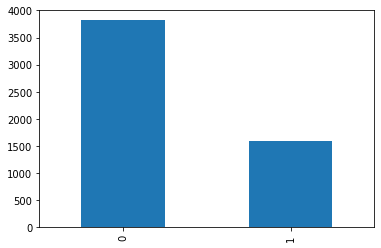

In [50]:
df["Class"].value_counts().plot(kind="bar")

In [51]:
df[df["Class"] == 0].shape[0] / df.shape[0]

0.7065136935603257

<AxesSubplot:>

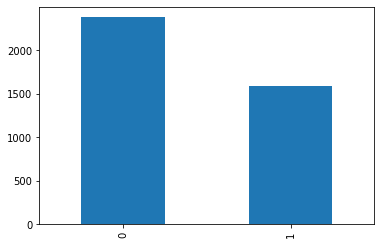

In [52]:
n = df[df["Class"] == 1].shape[0]

# Applying sampling change ratio to 2:3
df0 = df[df["Class"] == 0].sample(int(n * 1.5), replace=False)
df1 = df[df["Class"] == 1]
df = pd.concat([df0, df1])

df["Class"].value_counts().plot(kind="bar")

In [53]:
path_output = os.path.join(PATH_OUTPUT, "phoneme_subset.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/phoneme_subset.csv


In [54]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,V1,V2,V3,V4,V5,Class
3884,0.332309,0.737092,0.249673,0.414686,0.377027,0
4429,0.362249,0.500918,0.799483,0.204041,0.334785,0
3739,0.796477,0.538520,0.317057,0.474354,0.283329,0
3110,0.373982,0.498376,0.783147,0.227395,0.236260,0
3611,0.367520,0.487832,0.290926,0.307094,0.382423,0


In [55]:
df_preprocess.to_csv(os.path.join(PATH_PREPROCESSED, "phoneme_scale.csv"), index=False)

## 8. Ringnorm

In [56]:
path_data = os.path.join(PATH_DATA, "ringnorm.dat")
col_names = ["A{}".format(i) for i in range(1, 21)] + ["Class"]
df = pd.read_csv(path_data, skiprows=26, names=col_names, header=None, index_col=None)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(7399, 21)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,Class
0,947.0,543.0,782.0,-449.0,-8.0,1316.0,756.0,-61.0,1604.0,1686.0,...,-382.0,1259.0,608.0,-2292.0,1008.0,2687.0,-1422.0,-606.0,2374.0,1
1,759.0,-314.0,898.0,-1743.0,2003.0,1117.0,911.0,136.0,-489.0,-144.0,...,112.0,598.0,474.0,2026.0,1431.0,-336.0,79.0,1123.0,302.0,1
2,531.0,1374.0,517.0,1226.0,1122.0,-4.0,-1227.0,2277.0,1083.0,888.0,...,1063.0,2454.0,587.0,-744.0,1216.0,916.0,-476.0,6.0,-477.0,1
3,-1443.0,1065.0,2071.0,207.0,-865.0,-786.0,2655.0,-366.0,971.0,-341.0,...,4195.0,-117.0,-2694.0,14.0,4097.0,1356.0,-944.0,-602.0,2348.0,0
4,-258.0,-4696.0,-519.0,6469.0,-1878.0,-557.0,-62.0,5572.0,-62.0,1813.0,...,1299.0,-1926.0,61.0,-2941.0,-1953.0,-1007.0,-1042.0,1835.0,-1196.0,0


<AxesSubplot:>

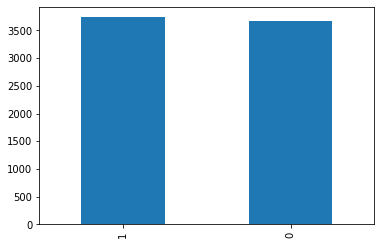

In [57]:
df["Class"].value_counts().plot(kind="bar")

In [61]:
path_output = os.path.join(PATH_OUTPUT, "ringnorm.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/ringnorm.csv


In [62]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,Class
0,0.594500,0.546437,0.554969,0.448461,0.528930,0.603550,0.606924,0.515220,0.599005,0.637501,...,0.494361,0.618935,0.548429,0.343211,0.579567,0.686986,0.469312,0.523193,0.633912,1
1,0.580219,0.485493,0.562529,0.354530,0.677158,0.589013,0.617944,0.530100,0.456342,0.506684,...,0.529184,0.569968,0.539333,0.636673,0.609725,0.476147,0.565076,0.653389,0.489511,1
2,0.562899,0.605533,0.537700,0.570049,0.612221,0.507123,0.465946,0.691820,0.563493,0.580456,...,0.596222,0.707460,0.547003,0.448416,0.594396,0.563468,0.529667,0.569277,0.435222,1
3,0.412944,0.583559,0.638970,0.496080,0.465763,0.449996,0.741931,0.492182,0.555858,0.492601,...,0.817003,0.517001,0.324306,0.499932,0.799800,0.594155,0.499809,0.523494,0.632100,0
4,0.502963,0.173873,0.470186,0.950639,0.391096,0.466725,0.548770,0.940705,0.485447,0.646579,...,0.612858,0.382991,0.511301,0.299103,0.368459,0.429349,0.493556,0.707003,0.385114,0


In [63]:
df_preprocess.to_csv(os.path.join(PATH_PREPROCESSED, "ringnorm_scale.csv"), index=False)

## 9. Texture

In [64]:
path_data = os.path.join(PATH_DATA, "texture.dat")
col_names = ["A{}".format(i) for i in range(1, 41)] + ["Class"]
df = pd.read_csv(path_data, skiprows=45, names=col_names, header=None, index_col=None)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(5500, 41)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A32,A33,A34,A35,A36,A37,A38,A39,A40,Class
0,-1.223,-0.798,-0.867,-0.639,-0.545,-0.412,-0.795,-0.629,-0.547,-0.868,...,-0.766,-0.555,-0.714,-0.545,-0.587,-0.871,-0.620,-0.568,-0.607,0
1,-1.410,-1.029,-1.013,-0.895,-0.762,-0.676,-1.043,-0.851,-0.775,-1.037,...,-0.919,-0.770,-0.847,-0.663,-0.723,-1.013,-0.748,-0.698,-0.817,0
2,-1.107,-0.649,-0.629,-0.492,-0.367,-0.298,-0.682,-0.478,-0.395,-0.681,...,-0.692,-0.445,-0.588,-0.371,-0.368,-0.746,-0.457,-0.379,-0.469,0
3,-1.270,-0.855,-0.958,-0.707,-0.619,-0.469,-0.872,-0.705,-0.620,-0.988,...,-0.829,-0.719,-0.774,-0.617,-0.688,-0.937,-0.693,-0.657,-0.779,0
4,-1.331,-0.862,-0.761,-0.689,-0.498,-0.361,-0.857,-0.600,-0.496,-0.779,...,-0.861,-0.571,-0.784,-0.545,-0.562,-0.952,-0.642,-0.578,-0.648,0


<AxesSubplot:>

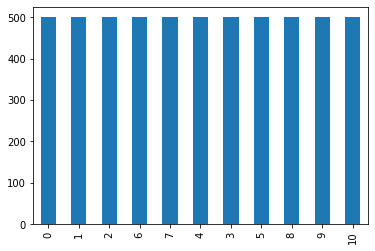

In [65]:
df["Class"].value_counts().plot(kind="bar")

In [66]:
path_output = os.path.join(PATH_OUTPUT, "texture.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/texture.csv


In [67]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A32,A33,A34,A35,A36,A37,A38,A39,A40,Class
0,0.102068,0.262745,0.267836,0.277385,0.340483,0.406186,0.238315,0.305142,0.341365,0.241785,...,0.236812,0.324918,0.284819,0.346863,0.373524,0.284438,0.369481,0.397496,0.361905,0
1,0.017986,0.111765,0.179565,0.126620,0.195040,0.224742,0.095211,0.154939,0.188755,0.137012,...,0.149083,0.206915,0.192201,0.259779,0.258853,0.178704,0.270333,0.295775,0.236905,0
2,0.154227,0.360131,0.411729,0.363958,0.459786,0.484536,0.303520,0.407307,0.443106,0.357719,...,0.279243,0.385291,0.372563,0.475277,0.558179,0.377513,0.495740,0.545383,0.444048,0
3,0.080935,0.225490,0.212817,0.237338,0.290885,0.367010,0.193883,0.253721,0.292503,0.167390,...,0.200688,0.234907,0.243036,0.293727,0.288364,0.235294,0.312936,0.327856,0.259524,0
4,0.053507,0.220915,0.331923,0.247939,0.371984,0.441237,0.202539,0.324763,0.375502,0.296962,...,0.182339,0.316136,0.236072,0.346863,0.394604,0.224125,0.352440,0.389671,0.337500,0


In [68]:
df_preprocess.to_csv(os.path.join(PATH_PREPROCESSED, "texture_scale.csv"), index=False)

## 10. Yeast

In [69]:
path_data = os.path.join(PATH_DATA, "yeast.dat")
col_names = [
    "Mcg",
    "Gvh",
    "Alm",
    "Mit",
    "Erl",
    "Pox",
    "Vac",
    "Nuc",
    "Class",
]
output_names = [
    "MIT",
    "NUC",
    "CYT",
    "ME1",
    "ME2",
    "ME3",
    "EXC",
    "VAC",
    "POX",
    "ERL",
]
df = pd.read_csv(path_data, skiprows=13, names=col_names, header=None, index_col=None)
cattype = CategoricalDtype(categories=output_names, ordered=False)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(1484, 9)


,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


<AxesSubplot:>

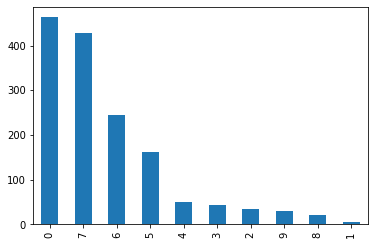

In [70]:
df["Class"].value_counts().plot(kind="bar")

(892, 9)


<AxesSubplot:>

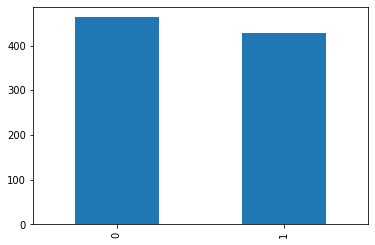

In [71]:
# Only select the major classes
df = df[(df["Class"] == 0) | (df["Class"] == 7)]

# Remap classes
cattype = CategoricalDtype(categories=[0, 7], ordered=True)
df["Class"] = df["Class"].astype(cattype).cat.codes

print(df.shape)
df["Class"].value_counts().plot(kind="bar")

In [72]:
path_output = os.path.join(PATH_OUTPUT, "yeast_subset.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/applicabilityDomain/data/numeric/clean/yeast_subset.csv


In [73]:
df_preprocess = preprocessing(df)
df_preprocess.head()

,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
3,0.594937,0.442857,0.367647,0.13,0.0,0.0,0.739726,0.22,1
5,0.506329,0.385714,0.352941,0.17,0.0,1.0,0.671233,0.22,0
7,0.468354,0.457143,0.397059,0.20,0.0,0.0,0.794521,0.34,1
9,0.367089,0.371429,0.411765,0.15,0.0,0.0,0.794521,0.30,0
10,0.405063,0.371429,0.323529,0.21,0.0,0.0,0.726027,0.27,1


In [74]:
df_preprocess.to_csv(os.path.join(PATH_PREPROCESSED, "yeast_scale.csv"), index=False)